In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
!wget https://dshs.texas.gov/coronavirus/CombinedHospitalDataoverTimebyTSA.xlsx

--2021-08-31 16:27:43--  https://dshs.texas.gov/coronavirus/CombinedHospitalDataoverTimebyTSA.xlsx
Resolving dshs.texas.gov (dshs.texas.gov)... 52.26.98.234
Connecting to dshs.texas.gov (dshs.texas.gov)|52.26.98.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 605615 (591K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘CombinedHospitalDataoverTimebyTSA.xlsx.1’

CombinedHospitalDat 100%[===================>] 591.42K  1.14MB/s    in 0.5s    

2021-08-31 16:27:44 (1.14 MB/s) - ‘CombinedHospitalDataoverTimebyTSA.xlsx.1’ saved [605615/605615]



In [3]:
!pip3 install openpyxl

In [4]:
df_Texas_Covid_ICUs = pd.read_excel("./CombinedHospitalDataoverTimebyTSA.xlsx",header=2,  sheet_name='Adult COVID-19 ICU', engine='openpyxl')

In [5]:
a = df_Texas_Covid_ICUs.set_index('TSA AREA')

In [6]:
a

,TSA ID,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,...,2021-08-20,2021-08-21,2021-08-22,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-28,2021-08-29
TSA AREA,,,,,,,,,,,,,,,,,,,,,
Amarillo,A.,4.0,5.0,5.0,2.0,6.0,9.0,5.0,10.0,6.0,...,65.0,65.0,70.0,68.0,65.0,62.0,69.0,70.0,70.0,68.0
Lubbock,B.,12.0,12.0,14.0,15.0,14.0,17.0,16.0,18.0,17.0,...,61.0,64.0,62.0,55.0,59.0,56.0,62.0,56.0,55.0,51.0
Wichita Falls,C.,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,25.0,25.0,26.0,28.0,30.0,30.0,30.0,29.0
Abilene,D.,2.0,3.0,0.0,3.0,3.0,2.0,1.0,2.0,2.0,...,24.0,26.0,26.0,29.0,32.0,33.0,31.0,37.0,31.0,34.0
Dallas/Ft. Worth,E.,161.0,256.0,150.0,215.0,224.0,221.0,190.0,196.0,188.0,...,779.0,808.0,819.0,842.0,848.0,882.0,875.0,859.0,865.0,879.0
Paris,F.,12.0,11.0,9.0,8.0,7.0,7.0,8.0,9.0,9.0,...,89.0,59.0,61.0,64.0,65.0,63.0,60.0,63.0,59.0,83.0
Longview/Tyler,G.,16.0,13.0,17.0,18.0,17.0,17.0,14.0,16.0,20.0,...,197.0,206.0,205.0,205.0,220.0,228.0,233.0,240.0,236.0,251.0
Lufkin,H.,5.0,4.0,5.0,2.0,7.0,5.0,15.0,10.0,9.0,...,48.0,58.0,62.0,67.0,67.0,62.0,64.0,61.0,60.0,61.0
El Paso,I.,6.0,9.0,6.0,13.0,10.0,16.0,18.0,14.0,19.0,...,47.0,46.0,46.0,48.0,49.0,48.0,44.0,44.0,47.0,46.0


In [7]:
a.T['San Antonio'][1:]

2020-04-11     22.0
2020-04-12     22.0
2020-04-13     25.0
2020-04-14     27.0
2020-04-15     11.0
              ...  
2021-08-25    403.0
2021-08-26    397.0
2021-08-27    402.0
2021-08-28    405.0
2021-08-29    402.0
Name: San Antonio, Length: 506, dtype: object

In [8]:
a.T['San Antonio'][1:].index[0][8:10]

'11'

In [9]:
dated_dict = {}
count = 0
for x in a.T['San Antonio'][1:].index:
    print(x)
    if x == '44051':
        day_temp = int(8)
        month_temp = int(8)
        year_temp = int(2020)
    else:
        day_temp = int(x[8:10])
        month_temp = int(x[5:7])
        year_temp = int(x[0:4])
    print(year_temp, month_temp, day_temp)
    dated_dict[datetime.datetime(year_temp, month_temp, day_temp)] = a.T['San Antonio'][count + 1]
    count += 1  
 

2020-04-11
2020 4 11
2020-04-12
2020 4 12
2020-04-13
2020 4 13
2020-04-14
2020 4 14
2020-04-15
2020 4 15
2020-04-16
2020 4 16
2020-04-17
2020 4 17
2020-04-18
2020 4 18
2020-04-19
2020 4 19
2020-04-20
2020 4 20
2020-04-21
2020 4 21
2020-04-22
2020 4 22
2020-04-23
2020 4 23
2020-04-24
2020 4 24
2020-04-25
2020 4 25
2020-04-26
2020 4 26
2020-04-27
2020 4 27
2020-04-28
2020 4 28
2020-04-29
2020 4 29
2020-04-30
2020 4 30
2020-05-01
2020 5 1
2020-05-02
2020 5 2
2020-05-03
2020 5 3
2020-05-04
2020 5 4
2020-05-05
2020 5 5
2020-05-06
2020 5 6
2020-05-07
2020 5 7
2020-05-08
2020 5 8
2020-05-09
2020 5 9
2020-05-10
2020 5 10
2020-05-11
2020 5 11
2020-05-12
2020 5 12
2020-05-13
2020 5 13
2020-05-14
2020 5 14
2020-05-15
2020 5 15
2020-05-16
2020 5 16
2020-05-17
2020 5 17
2020-05-18
2020 5 18
2020-05-19
2020 5 19
2020-05-20
2020 5 20
2020-05-21
2020 5 21
2020-05-22
2020 5 22
2020-05-23
2020 5 23
2020-05-24
2020 5 24
2020-05-25
2020 5 25
2020-05-26
2020 5 26
2020-05-27
2020 5 27
2020-05-28
2020 5 28
2

2021-07-31
2021 7 31
2021-08-01
2021 8 1
2021-08-02
2021 8 2
2021-08-03
2021 8 3
2021-08-04
2021 8 4
2021-08-05
2021 8 5
2021-08-06
2021 8 6
2021-08-07
2021 8 7
2021-08-08
2021 8 8
2021-08-09
2021 8 9
2021-08-10
2021 8 10
2021-08-11
2021 8 11
2021-08-12
2021 8 12
2021-08-13
2021 8 13
2021-08-14
2021 8 14
2021-08-15
2021 8 15
2021-08-16
2021 8 16
2021-08-17
2021 8 17
2021-08-18
2021 8 18
2021-08-19
2021 8 19
2021-08-20
2021 8 20
2021-08-21
2021 8 21
2021-08-22
2021 8 22
2021-08-23
2021 8 23
2021-08-24
2021 8 24
2021-08-25
2021 8 25
2021-08-26
2021 8 26
2021-08-27
2021 8 27
2021-08-28
2021 8 28
2021-08-29
2021 8 29


In [10]:
dated_dict

{datetime.datetime(2020, 4, 11, 0, 0): 22.0,
 datetime.datetime(2020, 4, 12, 0, 0): 22.0,
 datetime.datetime(2020, 4, 13, 0, 0): 25.0,
 datetime.datetime(2020, 4, 14, 0, 0): 27.0,
 datetime.datetime(2020, 4, 15, 0, 0): 11.0,
 datetime.datetime(2020, 4, 16, 0, 0): 15.0,
 datetime.datetime(2020, 4, 17, 0, 0): 19.0,
 datetime.datetime(2020, 4, 18, 0, 0): 18.0,
 datetime.datetime(2020, 4, 19, 0, 0): 17.0,
 datetime.datetime(2020, 4, 20, 0, 0): 32.0,
 datetime.datetime(2020, 4, 21, 0, 0): 37.0,
 datetime.datetime(2020, 4, 22, 0, 0): 35.0,
 datetime.datetime(2020, 4, 23, 0, 0): 25.0,
 datetime.datetime(2020, 4, 24, 0, 0): 32.0,
 datetime.datetime(2020, 4, 25, 0, 0): 33.0,
 datetime.datetime(2020, 4, 26, 0, 0): 36.0,
 datetime.datetime(2020, 4, 27, 0, 0): 38.0,
 datetime.datetime(2020, 4, 28, 0, 0): 31.0,
 datetime.datetime(2020, 4, 29, 0, 0): 35.0,
 datetime.datetime(2020, 4, 30, 0, 0): 35.0,
 datetime.datetime(2020, 5, 1, 0, 0): 39.0,
 datetime.datetime(2020, 5, 2, 0, 0): 32.0,
 datetime.da

In [11]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Active COVID-19 ICUs'])

In [12]:
dated_df

,Date,Active COVID-19 ICUs
0,2020-04-11,22.0
1,2020-04-12,22.0
2,2020-04-13,25.0
3,2020-04-14,27.0
4,2020-04-15,11.0
...,...,...
501,2021-08-25,403.0
502,2021-08-26,397.0
503,2021-08-27,402.0
504,2021-08-28,405.0


In [13]:
c = dated_df.set_index('Date')

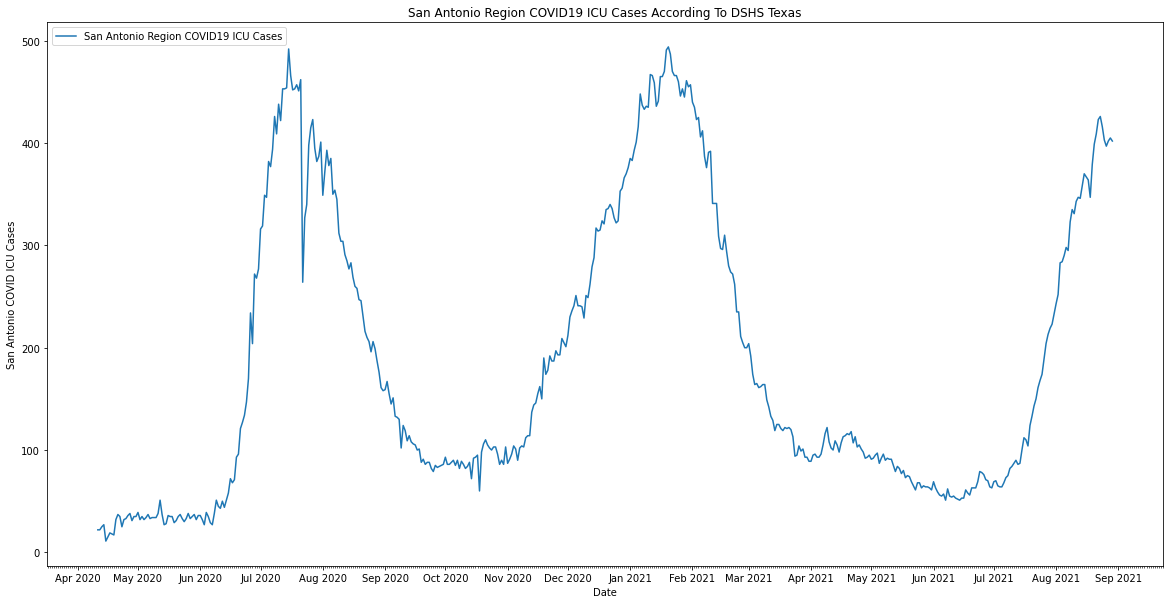

In [14]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('San Antonio COVID ICU Cases',color='black')
plt.plot(c)
plt.legend(['San Antonio Region COVID19 ICU Cases'], loc='upper left')
plt.title('San Antonio Region COVID19 ICU Cases According To DSHS Texas')
plt.savefig('SanAntonioICU.png')